In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [2]:
directory_path = "./"
def extract_subdirectories(directory_path):
    subdirectories = []
    for foldername, subfolders, filenames in os.walk(directory_path):
        subdirectories.extend(
            subfolder
            for subfolder in subfolders
            if subfolder.startswith("potential_")
        )
    return subdirectories

# subdirectories_list = extract_subdirectories(directory_path)
subdirectories_list = ['potential_0','potential_.1','potential_1']


/tmp/ipykernel_153480/2808991607.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))


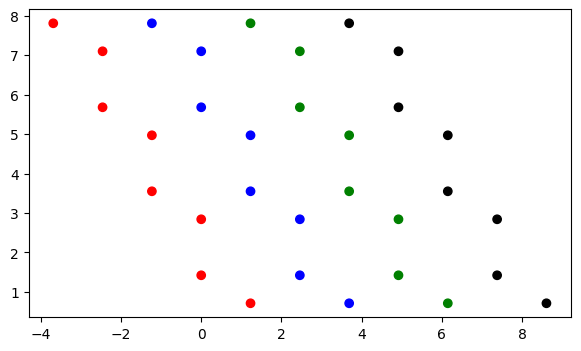

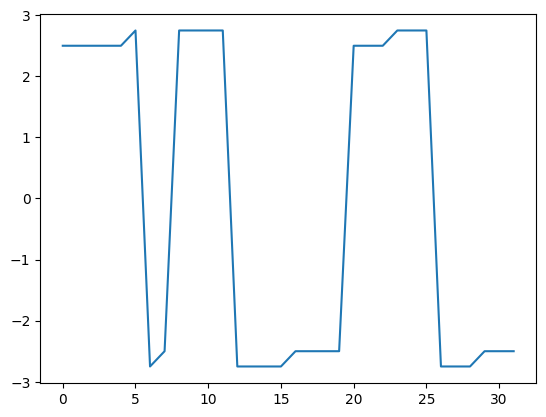

In [11]:
file = 'TG_hr_with_atom_coord.dat'
structure = np.loadtxt(file, usecols=(3,5,6,7,11,12,13))
df = pd.DataFrame(structure)
column_name = 0
df = df.drop_duplicates(subset=column_name)
x = df[1]
x_direct = df[4]
y = df[2]
lattice_period =9.84 # obtained from POSCAR x coordintate of lattice vector a
L = lattice_period # should be calculated as size of the unit cell along the x-axis
# b = L/2 #should be the x-coordinate of the mid point of the ribbon
b = 0.5

U0 =  5
perturb = 0.1 * U0/2.0
start1 = 0.25
end1 = 0.5
start2 = 0.5
end2 = 0.75

colors = []
potential = []
for i in range(len(x_direct)):
    # if 0 <= x.iloc[i] < b:
    if x_direct.iloc[i] < b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct.iloc[i] < end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct.iloc[i] < end2):
        V -= perturb
        color = 'green'
    potential.append(V)
    colors.append(color)
plt.figure(figsize=(7,4))
plt.scatter(x, y, c=colors, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()
plt.plot(potential)
plt.show()


[(0.0, 2.5), (0.001, 2.5), (0.002, 2.5), (0.003, 2.5), (0.004, 2.5), (0.005, 2.5), (0.006, 2.5), (0.007, 2.5), (0.008, 2.5), (0.009000000000000001, 2.5), (0.01, 2.5), (0.011, 2.5), (0.012, 2.5), (0.013000000000000001, 2.5), (0.014, 2.5), (0.015, 2.5), (0.016, 2.5), (0.017, 2.5), (0.018000000000000002, 2.5), (0.019, 2.5), (0.02, 2.5), (0.021, 2.5), (0.022, 2.5), (0.023, 2.5), (0.024, 2.5), (0.025, 2.5), (0.026000000000000002, 2.5), (0.027, 2.5), (0.028, 2.5), (0.029, 2.5), (0.03, 2.5), (0.031, 2.5), (0.032, 2.5), (0.033, 2.5), (0.034, 2.5), (0.035, 2.5), (0.036000000000000004, 2.5), (0.037, 2.5), (0.038, 2.5), (0.039, 2.5), (0.04, 2.5), (0.041, 2.5), (0.042, 2.5), (0.043000000000000003, 2.5), (0.044, 2.5), (0.045, 2.5), (0.046, 2.5), (0.047, 2.5), (0.048, 2.5), (0.049, 2.5), (0.05, 2.5), (0.051000000000000004, 2.5), (0.052000000000000005, 2.5), (0.053, 2.5), (0.054, 2.5), (0.055, 2.5), (0.056, 2.5), (0.057, 2.5), (0.058, 2.5), (0.059000000000000004, 2.5), (0.06, 2.5), (0.061, 2.5), (0.0

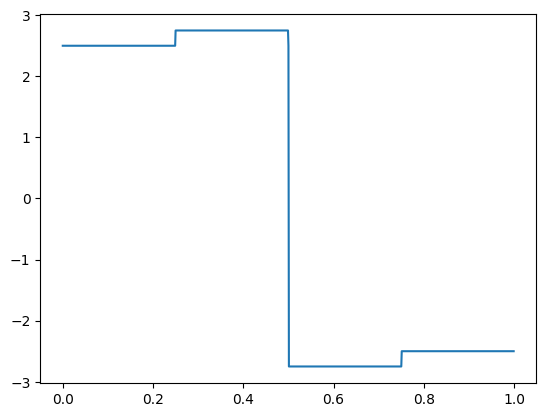

In [4]:
b = 0.5
delta = 0.0001
U0 =  5
colors = []
x_direct = np.arange(0,1,0.001)
perturb = 0.1 * U0/2.0
start1 = 0.25
end1 = 0.5
start2 = 0.5
end2 = 0.75
# Create empty lists to store position and potential pairs
positions_and_potentials = []

for i in range(len(x_direct)):
    if x_direct[i] <= b:
        V = U0 / 2.0
        color = 'red'
    else:
        V = -U0 / 2.0
        color = 'black'
    if (start1 <= x_direct[i] <= end1):
        V += perturb
        color = 'blue'
    if (start2 <= x_direct[i] <= end2):
        V -= perturb
        color = 'green'

    positions_and_potentials.append((x_direct[i], V))

# Sort the list of position and potential pairs based on position
sorted_positions_and_potentials = sorted(positions_and_potentials, key=lambda x: x[0])
print(sorted_positions_and_potentials)
# Extract sorted positions and potentials into separate lists
sorted_positions, sorted_potentials = zip(*sorted_positions_and_potentials)

plt.plot(sorted_positions,sorted_potentials)
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()
